Market Basket Analysis with Python

Thank you to Kaggle for the dataset:  https://www.kaggle.com/datasets/himaniraviborana/marketbasket-ariori

In [21]:
# the dataset was reduced by no more than a possible 5 items purchased

In [227]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import permutations
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pandas.plotting import parallel_coordinates

In [4]:
groc = pd.read_csv('Documents/market_basket_transactions.csv')
groc.head(2)

,TID,transaction
0,0.0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,1.0,"burgers,meatballs,eggs"


In [7]:
transactions = groc['transaction'].apply(lambda t: str(t).split(','))
transactions = list(transactions)

In [8]:
print(transactions[3])

['turkey', 'avocado']


In [9]:
transactions.count(['turkey', 'avocado'])

2

In [12]:
print(transactions[:5])

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]


In [13]:
transactions.count(['burgers', 'meatballs', 'eggs'])

1

In [15]:
# extract unique items
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [20]:
# compute and print rules
rules = list(permutations(items, 2))
print(rules)

[('green tea', 'cottage cheese'), ('green tea', 'bramble'), ('green tea', 'toothpaste'), ('green tea', 'oatmeal'), ('green tea', 'white wine'), ('green tea', 'turkey'), ('green tea', 'hot dogs'), ('green tea', 'energy drink'), ('green tea', 'cereals'), ('green tea', 'ham'), ('green tea', 'body spray'), ('green tea', 'napkins'), ('green tea', 'whole wheat pasta'), ('green tea', 'mushroom cream sauce'), ('green tea', 'cider'), ('green tea', 'herb & pepper'), ('green tea', 'chutney'), ('green tea', 'mineral water'), ('green tea', 'bug spray'), ('green tea', 'shampoo'), ('green tea', 'light cream'), ('green tea', 'brownies'), ('green tea', 'gluten free bar'), ('green tea', 'parmesan cheese'), ('green tea', 'frozen vegetables'), ('green tea', 'cookies'), ('green tea', 'green grapes'), ('green tea', 'pickles'), ('green tea', 'fromage blanc'), ('green tea', ' '), ('green tea', 'mint'), ('green tea', 'vegetables mix'), ('green tea', 'spaghetti'), ('green tea', 'french wine'), ('green tea', 'me

In [18]:
# print number of rules
print(len(rules))

14520


In [23]:
encoder = TransactionEncoder().fit(transactions)

In [24]:
onehot = encoder.transform(transactions)

In [25]:
onehot = pd.DataFrame(onehot, columns=encoder.columns_)
print(onehot)

             almonds  antioxydant juice  asparagus  avocado  babies food  \
0     False     True              False      False     True        False   
1     False    False              False      False    False        False   
2     False    False              False      False    False        False   
3     False    False              False      False     True        False   
4     False    False              False      False    False        False   
...     ...      ...                ...        ...      ...          ...   
7503  False    False              False      False    False        False   
7504  False    False              False      False    False        False   
7505  False    False              False      False    False        False   
7506  False    False              False      False    False        False   
7507   True    False              False      False    False        False   

      bacon  barbecue sauce  black tea  blueberries  ...  turkey  \
0     False        

In [26]:
print(onehot.mean())

                     0.000133
almonds              0.015450
antioxydant juice    0.006526
asparagus            0.002397
avocado              0.030368
                       ...   
whole wheat pasta    0.029435
whole wheat rice     0.045152
yams                 0.011055
yogurt cake          0.019180
zucchini             0.005061
Length: 121, dtype: float64


In [30]:
print(onehot.mean().sort_values(ascending=False))

mineral water    0.229222
spaghetti        0.169552
eggs             0.149307
chocolate        0.139318
french fries     0.129329
                   ...   
nan              0.000799
cream            0.000666
napkins          0.000400
water spray      0.000400
                 0.000133
Length: 123, dtype: float64


In [28]:
# define item sets with certain rules
onehot['shrimp+pasta'] = np.logical_and(onehot['shrimp'], onehot['pasta'])
print(onehot.mean())

                     0.000133
almonds              0.015450
antioxydant juice    0.006526
asparagus            0.002397
avocado              0.030368
                       ...   
whole wheat rice     0.045152
yams                 0.011055
yogurt cake          0.019180
zucchini             0.005061
shrimp+pasta         0.004795
Length: 122, dtype: float64


In [29]:
# define item sets with certain rules
onehot['almonds+eggs'] = np.logical_and(onehot['almonds'], onehot['eggs'])
print(onehot.mean())

                     0.000133
almonds              0.015450
antioxydant juice    0.006526
asparagus            0.002397
avocado              0.030368
                       ...   
yams                 0.011055
yogurt cake          0.019180
zucchini             0.005061
shrimp+pasta         0.004795
almonds+eggs         0.004395
Length: 123, dtype: float64


In [31]:
# define item sets with certain rules
onehot['mineral water+eggs'] = np.logical_and(onehot['mineral water'], onehot['eggs'])
print(onehot.mean())

                      0.000133
almonds               0.015450
antioxydant juice     0.006526
asparagus             0.002397
avocado               0.030368
                        ...   
yogurt cake           0.019180
zucchini              0.005061
shrimp+pasta          0.004795
almonds+eggs          0.004395
mineral water+eggs    0.033298
Length: 124, dtype: float64


In [ ]:
# confidence metric: probability that customer will buy Y given that they have purchased X

In [ ]:
# lift value greater than 1: tells that 2 items occur together in a transaction are less likely to random chance
# lift value good for filtering purposes

In [33]:
# compute support for mineral water, eggs
supportme = np.logical_and(onehot['mineral water'], onehot['eggs']).mean()
supportm = onehot['mineral water'].mean()
supporte = onehot['eggs'].mean()

In [35]:
confidence = supportme/supportm
lift = supportme/(supportm * supporte)

In [36]:
print(supporte, confidence, lift)

0.1493074054342035 0.1452643811737362 0.9729214753366738


In [37]:
# confidence for purchase eggs then mineral water
confidenceE = supportme/supporte
lift = supportme/(supportm * supporte)
print(supporte, confidenceE, lift)
# result shows higher chance of purchasing eggs then mineral water vs mineral water then eggs

0.1493074054342035 0.22301516503122212 0.9729214753366738


In [ ]:
# lift is less than 1.0. This could give us some confidence that the 
# association rule we recommended did arise by random chance.

In [38]:
# calculate Leverage
leverage = supportme - supportm*supporte
print(leverage)

-0.0009267507661513408


In [41]:
# calculate conviction
# compute support for mineral water and eggs and just mineral water
supportme = np.logical_and(onehot['mineral water'], onehot['eggs']).mean()
supportm = onehot['mineral water'].mean()

In [42]:
# compute support for NOT eggs
supportNe = 1.0 - onehot['eggs'].mean()

In [43]:
# computer support for minearal water and not eggs
supportmNe = supportm - supportme

In [44]:
# compute conviction
conviction = supportm*supportNe / supportmNe
print(conviction)

0.9952698540093377


In [45]:
# result less than 1 so not a strong conviction, maybe more random chance

In [47]:
# lift: calculated as a ratio, threshold for determining good rules is 1 
# leverage: calculated as a difference, threshold for determining good rules is 0

In [ ]:
# CALCULATE CROSS SELLING ABILITIES: 
#As a test of your abilities, compute conviction for the rule {YogaMat}  {YogaBall}, 
#so you can decide whether to place the YogaMat next to the YogaBall on the company's website. 

In [ ]:
## Compute support for Mat AND Ball
# supportMB = np.logical_and(yoga['mat'], yoga['ball']).mean()
## Compute support for mat
# supportM = yoga['mat'].mean()
## Compute support for NOT ball
# supportnB = 1.0 - yoga['ball'].mean()
## Compute support for mat and NOT ball
# supportMnB = supportM - supportMB
## Compute and print conviction for mat -> ball
# conviction = supportM * supportnB / supportMnB
# print("Conviction: %.2f" % conviction)
# if result conviction is less than 1, it is not supported
# if result conviction is greater than 1, it is supported and could be placed together

In [ ]:
# create a function to run this cross selling process
# def conviction(antecedent, consequent):
##    Compute support for antecedent AND consequent
#     supportAC = np.logical_and(antecedent, consequent).mean()
##    Compute support for antecedent
#     supportA = antecedent.mean()
##    Compute support for NOT consequent
#     supportnC = 1.0 - consequent.mean()
##    Compute support for antecedent and NOT consequent
#     supportAnC = supportA - supportAC
##    Return conviction
#     return supportA * supportnC / supportAnC

In [ ]:
# run function
## Compute conviction for YogaMat -> YogaBall and ball -> mat
# convictionMB = conviction(mat, ball)
# convictionBM = conviction(ball, mat)
## Print results
# print('Yoga Mat -> Yoga Ball: ', convictionMB)
# print('Yoga Ball -> Yoga Mat: ', convictionBM)

# The conviction metric for if Yoga Mat then Yoga Ball and 
# if Yoga Ball then Yoga Mat if are both above 1, indicating then they are both viable rules.

In [ ]:
# disassociation of items that do not typically sell together ie yoga and hardware tools
# 1 = perfect association
# -1 = perfect disassocation

In [ ]:
# compute Zhang's metric
# use coffee and tea
# support

In [52]:
supportE = onehot['eggs'].mean()
supportC = onehot['chocolate'].mean()
supportEC = np.logical_and(onehot['eggs'], onehot['chocolate']).mean()
print(supportE)
print(supportC)
print(supportEC)

0.1493074054342035
0.13931806073521577
0.017448055407565263


In [53]:
num = supportEC - supportE*supportC

In [54]:
denom = max(supportEC*(1-supportE), supportE*(supportC-supportEC))

In [55]:
Zhang = num/denom
print(Zhang)

-0.18427925885845484


In [ ]:
# result negative meaning disassociation, do not sell together(not best match to cross sell)

In [56]:
supportS = onehot['shrimp'].mean()
supportP = onehot['herb & pepper'].mean()
supportSP = np.logical_and(onehot['shrimp'], onehot['herb & pepper']).mean()
print(supportS)
print(supportP)
print(supportSP)

0.07125732551944593
0.04941395844432605
0.006925945657964837


In [57]:
SPsellN = supportSP - supportS *supportP
SPsellD = max(supportSP*(1-supportS), supportS*(supportP-supportSP))
ShrimpPepper = num/denom
print(ShrimpPepper)  # not a good cross sell based on data

-0.18427925885845484


In [ ]:
# zhang's function, antecedent & consequent
# # Define a function to compute Zhang's metric
# def zhang(antecedent, consequent):
#   # Compute the support of each book
#   supportA = antecedent.mean()
#   supportC = consequent.mean()
##  Compute the support of both books
#   supportAC = np.logical_and(antecedent, consequent).mean()
##  Complete the expressions for the numerator and denominator
#   numerator = supportAC - supportA*supportC
#   denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))
##  Return Zhang's metric
#   return numerator / denominator

In [58]:
# market basket analysis:
# 1. generate a large set of rules 
# 2. using metrics filter rules/pruning
# 3. apply common sense and intuition

In [ ]:
# use multi metric filtering to find rules that are useful
# filter = Dataframe(has all of the output with 
# antecedent, consequent, antecedent_support, support, confidence, lift, conviction)
# print(filter.head())
# filter = filter[filter['consequent_support']<0.5]
# print(len(filter))

In [ ]:
# filter = filter[filter['lift']>1.5]
# print(len(filter))

Aggregation of sales data

Thank you to Kaggle for this dataset:  https://www.kaggle.com/datasets/csepython/frequent-items-for-customer-retailer

In [96]:
mbagg = pd.read_csv('Documents/market_basket_agg.csv')
mbagg.head()

,transaction id,item
0,1,Apple
1,1,Milk
2,1,Butter
3,2,Apple
4,2,Banana


In [97]:
# how many unique transactions?
print(len(mbagg['transaction id']))
print(len (mbagg['transaction id'].unique()))

310
128


In [98]:
mbagg['item'].unique()

array(['Apple', 'Milk', 'Butter', 'Banana', 'Mango', 'Orange'],
      dtype=object)

In [99]:
# how many unique items?
print(len (mbagg['item'].unique()))

6


In [100]:
# this example may not be the best, with only 6 unique items

In [101]:
# onehot encode the data, make a copy of the data calling it mba for market basket analysis
mba = mbagg
print(mba.head(2))

   transaction id   item
0               1  Apple
1               1   Milk


In [102]:
encodermba = TransactionEncoder().fit(mba)

In [103]:
onehotmba = encodermba.transform(mba)

In [104]:
onehotmba = pd.DataFrame(onehotmba, columns=encodermba.columns_)
print(onehotmba.head(2))

              a      c      d      e     i      m      n      o      r      s  \
0   True   True   True   True  False  True  False   True   True   True   True   
1  False  False  False  False   True  True   True  False  False  False  False   

      t  
0  True  
1  True  


In [92]:
# already aggregated data, use Milk and Apple for this code
#dairy_headers = [i for i in onehotmba.columns if i.lower().find('Milk')>=0]
#fruit_headers = [i for i in onehotmba.columns if i.lower().find('Apple')>=0]

In [105]:
# identify headers of columns
#dairy = onehotmba[dairy_headers]
#fruit = onehotmba[fruit_headers]
#print(dairy.head())

In [109]:
# sum over the coluumns to see if it is dairy or fruit
#dairy = (dairy.sum(axis=1) >0.0).values

#fruit = (fruit.sum(axis=1) >0.0).values
#print(dairy)
#print(fruit)

In [111]:
onehotmba.head(7)

,,a,c,d,e,i,m,n,o,r,s,t
0,True,True,True,True,False,True,False,True,True,True,True,True
1,False,False,False,False,True,True,True,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False


Market Basket Analysis In Python|How to implement market basket analysis in Python|apriori algorithm  https://www.youtube.com/watch?v=4QIWJVVWJdQ 

In [123]:
# data cleaning
retaildata['Description'] = retaildata['Description'].str.strip() #removes spaces from beginning and end
retaildata.dropna(axis=0, subset=['InvoiceNo'], inplace=True) #removes duplicates
retaildata['InvoiceNo'] = retaildata['InvoiceNo'].astype('str') #convert to a string
retaildata = retaildata[~retaildata['InvoiceNo'].str.contains('C')] #removes the credit transaction
retaildata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerNo,Country
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010,4.25,17850,United Kingdom
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010,7.65,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850,United Kingdom


In [124]:
retaildata['Country'].value_counts()

United Kingdom          292440
Germany                   7739
France                    6804
EIRE                      6038
Spain                     2198
Netherlands               2118
Belgium                   1789
Switzerland               1747
Portugal                  1241
Australia                 1147
Norway                     847
Channel Islands            734
Finland                    612
Italy                      576
Cyprus                     514
Sweden                     413
Poland                     330
Austria                    321
Japan                      289
Denmark                    286
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    171
Canada                     151
USA                        147
Greece                     109
Malta                      100
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [126]:
retaildata.shape

(329923, 8)

In [127]:
# run analysis on Germany data to speed up processing
germanydata = (retaildata[retaildata['Country']=='Germany'].groupby(
                ['InvoiceNo', 'Description'])['Quantity']
              .sum().unstack().reset_index().fillna(0)
              .set_index('InvoiceNo'))

In [128]:
germanydata.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
# change data to 0 and 1 so that the Apriori algorithm can run
# all positive values to 1 and all 0.0 to o
def units_encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
germany_basketsets = germanydata.applymap(units_encode)
germany_basketsets.drop('POSTAGE', inplace=True, axis=1)

In [132]:
# train germany_basketsets model
# find frequent itemsets
germany_frq_itemsets = apriori(germany_basketsets, min_support=0.07, use_colnames=True)

In [133]:
#generate rules
germany_rules = association_rules(germany_frq_itemsets, metric='lift', min_threshold=1)

In [134]:
# view top 10 results
germany_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.113158,0.139474,0.071053,0.627907,4.501975,0.055270,2.312664
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.139474,0.113158,0.071053,0.509434,4.501975,0.055270,1.807794
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.257895,0.139474,0.081579,0.316327,2.268002,0.045609,1.258680
3,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139474,0.257895,0.081579,0.584906,2.268002,0.045609,1.787799
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.257895,0.168421,0.142105,0.551020,3.271684,0.098670,1.852153
5,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.168421,0.257895,0.142105,0.843750,3.271684,0.098670,4.749474
6,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.257895,0.110526,0.076316,0.295918,2.677357,0.047812,1.263310
7,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.110526,0.257895,0.076316,0.690476,2.677357,0.047812,2.397571


In [136]:
# Recommendations: look at index 7
germany_basketsets['SPACEBOY LUNCH BOX'].sum()

42

In [137]:
# Recommendations: look at index 7 consequent
germany_basketsets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

98

In [138]:
# filter rules based on certain conditions
germany_rules[(germany_rules['lift']>=4) &
                    (germany_rules['confidence']>=0.4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.113158,0.139474,0.071053,0.627907,4.501975,0.05527,2.312664
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.139474,0.113158,0.071053,0.509434,4.501975,0.05527,1.807794


In [ ]:
# use cross promotion to see more and aggregration for store layout


In [139]:
germany_frq_itemsets = apriori(germany_basketsets, min_support=0.07, use_colnames=True)
germany_rules = association_rules(germany_frq_itemsets, metric='lift', min_threshold=1)
germany_rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.168421,0.257895,0.142105,0.843750,3.271684,0.098670,4.749474
7,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.110526,0.257895,0.076316,0.690476,2.677357,0.047812,2.397571
0,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.113158,0.139474,0.071053,0.627907,4.501975,0.055270,2.312664
3,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.139474,0.257895,0.081579,0.584906,2.268002,0.045609,1.787799
4,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.257895,0.168421,0.142105,0.551020,3.271684,0.098670,1.852153
1,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.139474,0.113158,0.071053,0.509434,4.501975,0.055270,1.807794
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.257895,0.139474,0.081579,0.316327,2.268002,0.045609,1.258680
6,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.257895,0.110526,0.076316,0.295918,2.677357,0.047812,1.263310


place the consequent next to the actecedent for increased sales from product placement
for example:

ROUND SNACK BOXES SET OF 4 FRUITS -> ROUND SNACK BOXES SET OF4 WOODLAND

SPACEBOY LUNCH BOX -> ROUND SNACK BOXES SET OF4 WOODLAND

etc 

ROUND SNACK BOXES SET OF4 WOODLAND -> SPACEBOY LUNCH BOX


Now further filtering for cross selling and floor plan layout 

In [ ]:
# see data camp printout code, Advanced Apriori results pruning

Thank you to Kaggle for the dataset:  https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews?select=Musical_instruments_reviews.csv

In [140]:
# cleaned data to be ratings of  4 or 5 only
ratings = pd.read_csv('Documents/amazon_instr_rating.csv')
print(ratings.head())

       reviewerID        asin  overall
0  A2IBPI20UZIR0U  1384719342        5
1  A14VAT5EAX3D9S  1384719342        5
2  A195EZSQDW3E21  1384719342        5
3  A2C00NNG1ZQQG2  1384719342        5
4   A94QU4C90B1AX  1384719342        5


In [142]:
# set up format for data
# select unique user ids
user_id = ratings['reviewerID'].unique()

In [145]:
# create a library for each reviewer 
library = [list(ratings[ratings['reviewerID']==u].asin) for u in user_id]

In [146]:
# print library at index 5
print(library[5])

['B00004Y2UT', 'B0002CZVXM', 'B0002E382Q', 'B0002IAJ56', 'B000PO30QM', 'B0016ML1C2', 'B002Q0WSO8', 'B004UNL1P6', 'B0002F7IN0', 'B000B6DHAS', 'B000KIPD5E']


In [149]:
am_encoder = TransactionEncoder()

In [150]:
am_onehot = am_encoder.fit(library).transform(library)

In [151]:
# create dataframe with asin as column headers
am_onehot = pd.DataFrame(am_onehot, columns=am_encoder.columns_)

In [152]:
# print results
print(am_onehot.head())

   1384719342  B00004Y2UT  B00005ML71  B000068NSX  B000068NTU  B000068NVI  \
0        True       False       False       False       False       False   
1        True       False       False       False       False       False   
2        True       False       False       False       False       False   
3        True       False       False       False       False       False   
4        True       False       False       False       False       False   

   B000068NW5  B000068NZC  B000068NZG  B000068O1N  ...  B00EPWAQS0  \
0       False       False       False       False  ...       False   
1       False       False       False       False  ...       False   
2       False       False       False       False  ...       False   
3       False       False       False       False  ...       False   
4       False       False       False       False  ...       False   

   B00EQDITGO  B00F2PKRJW  B00FXKIG5I  B00GTSM8FW  B00H02C9TG  B00HFRXACG  \
0       False       False       False  

In [153]:
# am_onehot: each column is a asin product, each row is reviewer's unique user library
# create heatmap, black low intensity 
# prepare rules for heatmap: 1.generate rules 
#                            2.convert antecedents & consequents into strings 
#                            3. convert rules into matrix format

In [155]:
am_frequent_itemsets = apriori(am_onehot, min_support=0.10, use_colnames=True, max_len=2)
am_rules = association_rules(am_frequent_itemsets)

In [158]:
am_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [161]:
am_frequent_itemsets.head()

,support,itemsets
0,0.106368,(B003VWJ2K8)


In [169]:
am_rules['antecedents'] = am_rules['antecedents'].apply(lambda a: ','.join(list(a)))
am_rules['consequents'] = am_rules['consequents'].apply(lambda a: ','.join(list(a)))

In [170]:
print(am_rules[['antecedents', 'consequents']])

Empty DataFrame
Columns: [antecedents, consequents]
Index: []


In [166]:
am2_frequent_itemsets = apriori(am_onehot, min_support=0.0010, use_colnames=True, max_len=2)
am2_rules = association_rules(am2_frequent_itemsets)

In [167]:
am2_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(B0002E3MRW),(B0002GXF8Q),0.002099,0.020994,0.002099,1.000000,47.633333,0.002055,inf
1,(B0002H0SKS),(B0002GYW4C),0.001400,0.020294,0.001400,1.000000,49.275862,0.001371,inf
2,(B0002KZFYE),(B0002KZE7C),0.004899,0.016095,0.004199,0.857143,53.254658,0.004120,6.887334
3,(B000T9NKEU),(B000KIRT74),0.001400,0.011197,0.001400,1.000000,89.312500,0.001384,inf
4,(B0010KCP98),(B0018TAITA),0.001400,0.012596,0.001400,1.000000,79.388889,0.001382,inf


In [168]:
am2_rules['antecedents'] = am2_rules['antecedents'].apply(lambda b: ','.join(list(b)))
am2_rules['consequents'] = am2_rules['consequents'].apply(lambda b: ','.join(list(b)))

In [171]:
print(am2_rules[['antecedents', 'consequents']])

  antecedents consequents
0  B0002E3MRW  B0002GXF8Q
1  B0002H0SKS  B0002GYW4C
2  B0002KZFYE  B0002KZE7C
3  B000T9NKEU  B000KIRT74
4  B0010KCP98  B0018TAITA
5  B0050ALN2E  B0016ZZKJO
6  B007Q28BHE  B005LYIW3W
7  B00E0EXYMS  B00IZCSW3M
8  B00HFRXACG  B00IZCSW3M


In [172]:
support_table2 = am2_rules.pivot(index='consequents', columns='antecedents', values='support')

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

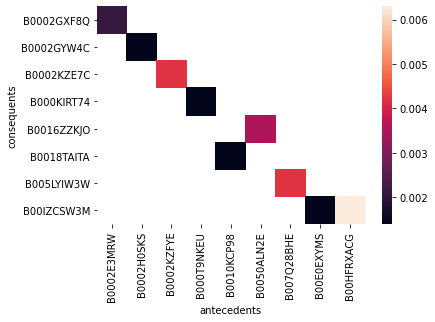

In [173]:
sb.heatmap(support_table2)

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

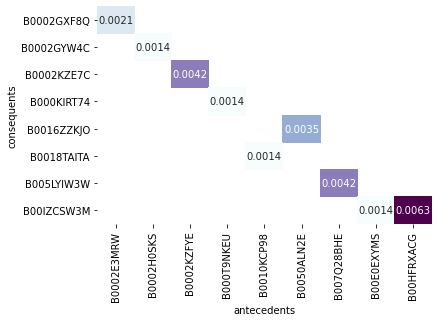

In [177]:
# customize the heatmap
sb.heatmap(support_table2, annot=True, cbar=False, cmap="BuPu")

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

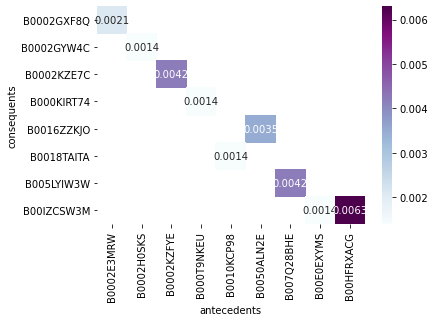

In [178]:
# customize the heatmap
sb.heatmap(support_table2, annot=True, cbar=True, cmap="BuPu")

SCATTERPLOT 

In [179]:
# displays pairs and values, antecendent/consequence or confidence/lift or support/confidence
# ability to find patterns
# can show where to prune if needed

In [184]:
am_onehot_sp = am_onehot

In [185]:
# generate frequent itemsets using apriori
am_frequent_itemsets_sp = apriori(am_onehot_sp, min_support=0.01, use_colnames=True, max_len=2)

# generate association rules
am_rules_sp = association_rules(am_frequent_itemsets_sp, metric='support', min_threshold=0.0)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

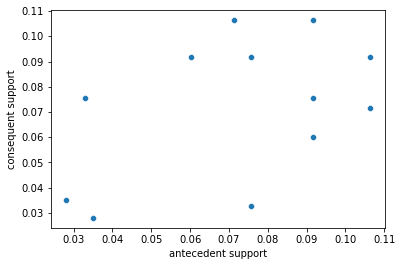

In [186]:
sb.scatterplot(x='antecedent support', y='consequent support', data=am_rules_sp)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

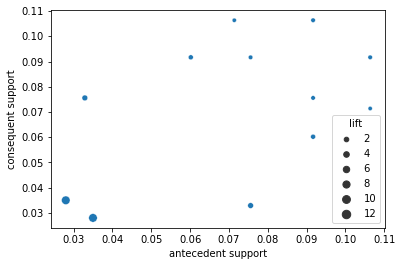

In [187]:
# add lift as 3rd metric
sb.scatterplot(x='antecedent support', y='consequent support', size='lift', data=am_rules_sp)

PARALLEL COORDINATES PLOT

In [192]:
am_onehot_pcp = am_onehot

In [196]:
# generate frequent itemsets using apriori
am_frequent_itemsets_pcp = apriori(am_onehot_pcp, min_support=0.010, use_colnames=True, max_len=2)

# generate association rules
am_rules_pcp = association_rules(am_frequent_itemsets_pcp, metric='support', min_threshold=0.0)

In [197]:
# converting rules to coordinates
am_rules_pcp['antecedents'] = am_rules_pcp['antecedents'].apply(lambda antecedent: list(antecedent)[0])
am_rules_pcp['consequents'] = am_rules_pcp['consequents'].apply(lambda consequent: list(consequent)[0])
am_rules_pcp['rule_pcp'] = am_rules_pcp.index

In [198]:
coordinates = am_rules_pcp[['antecedents','consequents','rule_pcp' ]]
print(coordinates.head())

  antecedents consequents  rule_pcp
0  B000978D58  B0002CZW0Y         0
1  B0002CZW0Y  B000978D58         1
2  B0002E1G5C  B0002F7K7Y         2
3  B0002F7K7Y  B0002E1G5C         3
4  B0002E1G5C  B0002H0A3S         4


<AxesSubplot:>

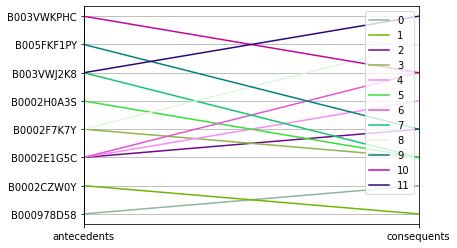

In [202]:
parallel_coordinates(coordinates, 'rule_pcp')

In [220]:
# prune more
am_frequent_itemsets_pcp2 = apriori(am_onehot_pcp, min_support=0.0010, use_colnames=True, max_len=2)

# generate association rules
am_rules_pcp2 = association_rules(am_frequent_itemsets_pcp2, metric='lift', min_threshold=1.0)

In [221]:
# converting rules to coordinates
am_rules_pcp2['antecedents'] = am_rules_pcp['antecedents'].apply(lambda antecedent: list(antecedent)[0])
am_rules_pcp2['consequents'] = am_rules_pcp['consequents'].apply(lambda consequent: list(consequent)[0])
am_rules_pcp2['rule_pcp'] = am_rules_pcp2.index

In [223]:
coordinates2 = am_rules_pcp2[['antecedents','consequents','rule_pcp' ]]
print(coordinates2.head())

  antecedents consequents  rule_pcp
0           B           B         0
1           B           B         1
2           B           B         2
3           B           B         3
4           B           B         4


In [226]:
#parallel_coordinates(coordinates2, 'rule_pcp')  
# error output Image size of 412x104302 pixels is too large. It must be less than 2^16 in each direction.

In [ ]:
# not best dataset for this type of plot